In [3]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt


In [70]:
# Import audio
audioFile = "audio.wav"
ipd.Audio(audioFile)

In [95]:
# Calculate Short-Time Fourier Transform of audio
audioArray, sampleRate = librosa.load(audioFile)

frameSize = 2048
hopSize = 512

audioSTFT = librosa.stft(audioArray, n_fft=frameSize, hop_length=hopSize)


In [96]:
audioSTFT2 = np.copy(audioSTFT)
audioSTFT2[:20,:] = audioSTFT2[:20,:] * 0

array2 = librosa.istft(audioSTFT2,n_fft=frameSize, hop_length=hopSize)


ipd.Audio(array2, rate=sampleRate)

In [97]:
#Plot Spectrogram
def plotLogSpectrogram(Y, sampleRate, hopSize, yAxis="linear"):
    plt.figure(figsize=(25,10))
    librosa.display.specshow(Y,sr=sampleRate,hop_length=hopSize,x_axis="time",y_axis=yAxis)

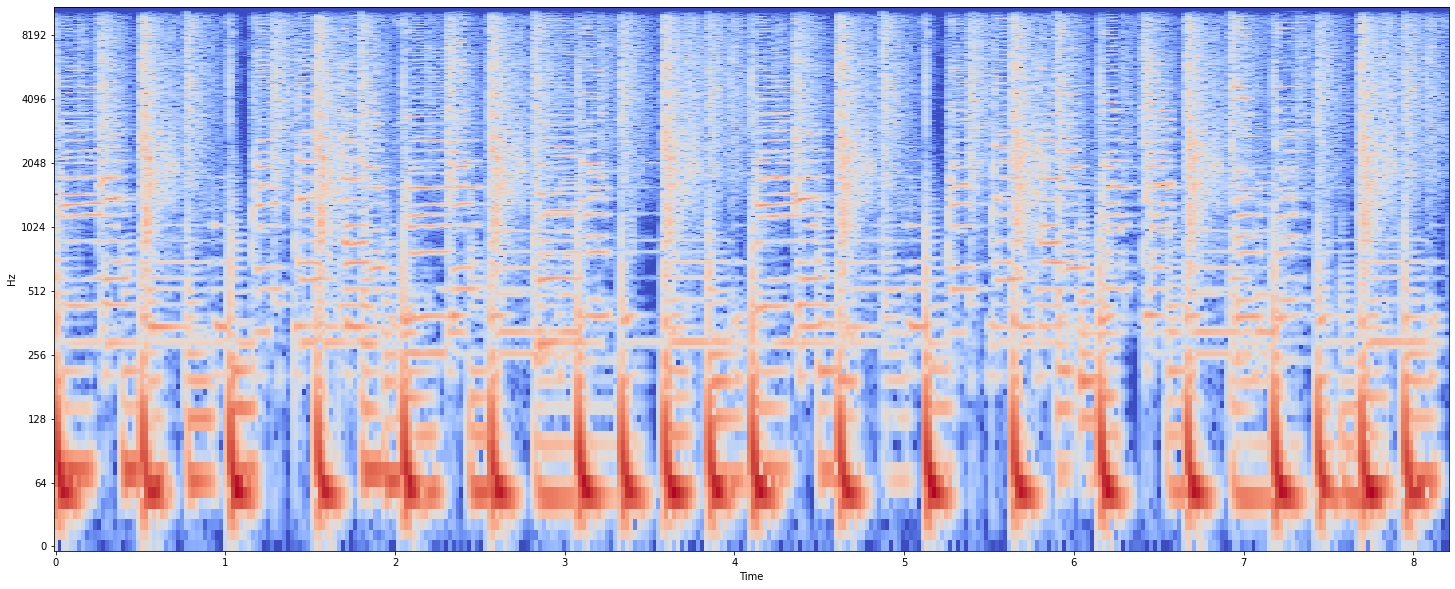

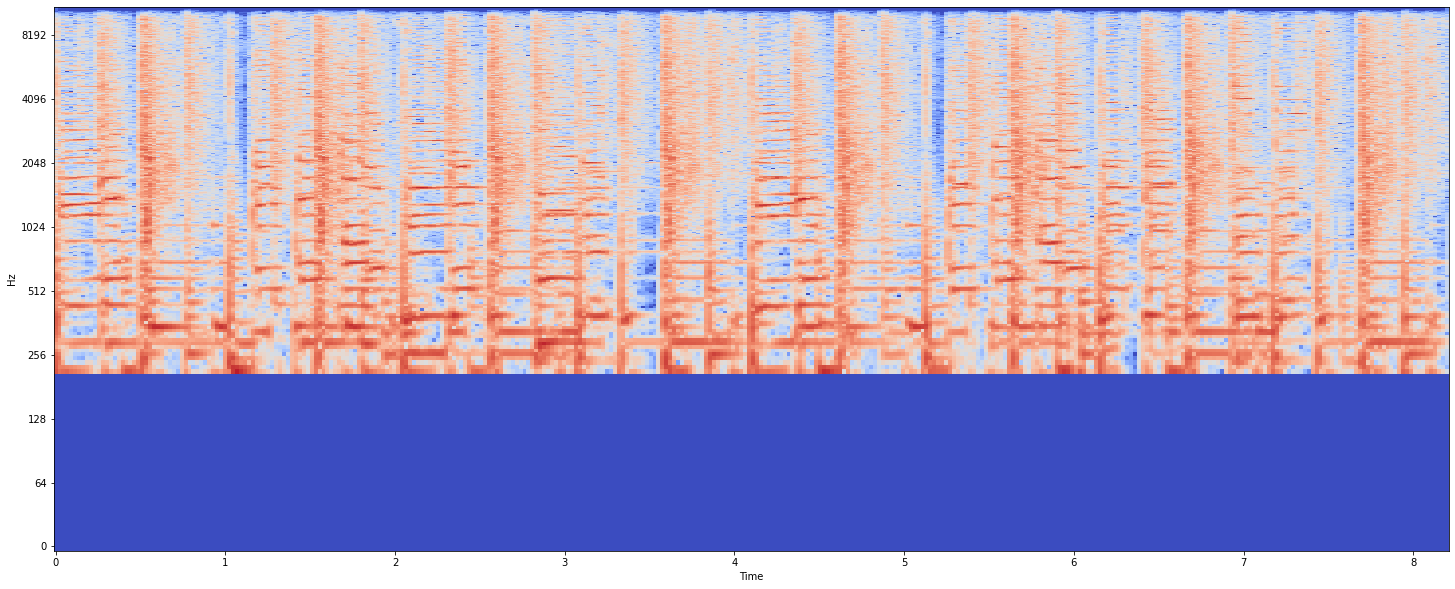

In [98]:
# Calculate Spectrogram
audioSpectrogram = librosa.power_to_db(np.abs(audioSTFT)**2)
audioSpectrogram2 = librosa.power_to_db(np.abs(audioSTFT2)**2)

plotLogSpectrogram(audioSpectrogram, sampleRate, hopSize, yAxis="log")
plotLogSpectrogram(audioSpectrogram2, sampleRate, hopSize, yAxis="log")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass y=[-0.00253643  0.00884925  0.00030546 ...  0.02270367  0.02774012
  0.04983621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


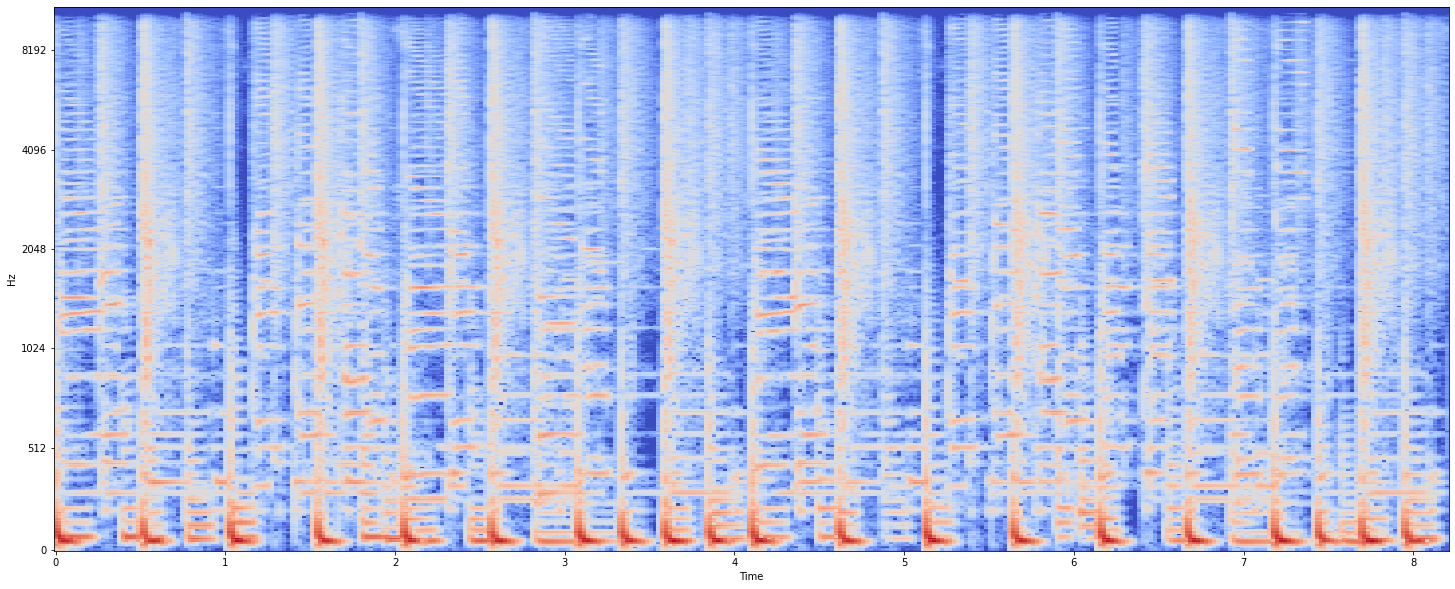

In [66]:
melSpectrogram = librosa.power_to_db(librosa.feature.melspectrogram(audioArray, sr=sampleRate, n_fft=2048, hop_length=512, n_mels=512))

plt.figure(figsize=(25,10))
librosa.display.specshow(melSpectrogram, x_axis="time", y_axis="mel", sr=sampleRate)

In [67]:
reconstructedAudio = librosa.feature.inverse.mel_to_audio(melSpectrogram, sr=sampleRate, n_fft=2048, hop_length=512)
ipd.Audio(reconstructedAudio, rate=sampleRate)